In [1]:
import numpy as np
import pandas as pd
import string
from tqdm import tqdm
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt

# READING DATA

In [2]:
stopwords=open('text.txt')
file=open('text.txt',encoding='utf-8') 
print("File is open");

File is open


# REMOVING NEW LINES

In [3]:
text = file.read().replace('\n','')
print(text)

Today we will be learning about the fundamentals of data science and statistics. Data Science and statistics are hot and growing fields with alternative names of machine learning, artificial intelligence, big data, etc. I'm really excited to talk to you about data science and statistics because data science and statistics have long been passions of mine. I didn't use to be very good at data science and statistics but after studying data science and statistics for a long time, I got better and better at it until I became a data science and statistics expert. I'm really excited to talk to you about data science and statistics, thanks for listening to me talk about data science and statistics.


# Removing Punctuation

In [4]:
for character in string.punctuation:
    text=text.replace(character,'')
print(text)

Today we will be learning about the fundamentals of data science and statistics Data Science and statistics are hot and growing fields with alternative names of machine learning artificial intelligence big data etc Im really excited to talk to you about data science and statistics because data science and statistics have long been passions of mine I didnt use to be very good at data science and statistics but after studying data science and statistics for a long time I got better and better at it until I became a data science and statistics expert Im really excited to talk to you about data science and statistics thanks for listening to me talk about data science and statistics


# Converting in lower case

In [5]:
text = text.lower().split()
print(text)

['today', 'we', 'will', 'be', 'learning', 'about', 'the', 'fundamentals', 'of', 'data', 'science', 'and', 'statistics', 'data', 'science', 'and', 'statistics', 'are', 'hot', 'and', 'growing', 'fields', 'with', 'alternative', 'names', 'of', 'machine', 'learning', 'artificial', 'intelligence', 'big', 'data', 'etc', 'im', 'really', 'excited', 'to', 'talk', 'to', 'you', 'about', 'data', 'science', 'and', 'statistics', 'because', 'data', 'science', 'and', 'statistics', 'have', 'long', 'been', 'passions', 'of', 'mine', 'i', 'didnt', 'use', 'to', 'be', 'very', 'good', 'at', 'data', 'science', 'and', 'statistics', 'but', 'after', 'studying', 'data', 'science', 'and', 'statistics', 'for', 'a', 'long', 'time', 'i', 'got', 'better', 'and', 'better', 'at', 'it', 'until', 'i', 'became', 'a', 'data', 'science', 'and', 'statistics', 'expert', 'im', 'really', 'excited', 'to', 'talk', 'to', 'you', 'about', 'data', 'science', 'and', 'statistics', 'thanks', 'for', 'listening', 'to', 'me', 'talk', 'about'

# Prepare Training Data

In [6]:
WINDOW_SIZE = 3#3 words before and after main word
NUM_NEGATIVE_SAMPLES = 3#per word we will have 3 negative sample to make our model learn negative samples as well
data=[]

#for index,center_word in enumerate(text[WINDOW_SIZE-1:-WINDOW_SIZE]):
print(list(enumerate(text[WINDOW_SIZE-1:-WINDOW_SIZE])))   

[(0, 'will'), (1, 'be'), (2, 'learning'), (3, 'about'), (4, 'the'), (5, 'fundamentals'), (6, 'of'), (7, 'data'), (8, 'science'), (9, 'and'), (10, 'statistics'), (11, 'data'), (12, 'science'), (13, 'and'), (14, 'statistics'), (15, 'are'), (16, 'hot'), (17, 'and'), (18, 'growing'), (19, 'fields'), (20, 'with'), (21, 'alternative'), (22, 'names'), (23, 'of'), (24, 'machine'), (25, 'learning'), (26, 'artificial'), (27, 'intelligence'), (28, 'big'), (29, 'data'), (30, 'etc'), (31, 'im'), (32, 'really'), (33, 'excited'), (34, 'to'), (35, 'talk'), (36, 'to'), (37, 'you'), (38, 'about'), (39, 'data'), (40, 'science'), (41, 'and'), (42, 'statistics'), (43, 'because'), (44, 'data'), (45, 'science'), (46, 'and'), (47, 'statistics'), (48, 'have'), (49, 'long'), (50, 'been'), (51, 'passions'), (52, 'of'), (53, 'mine'), (54, 'i'), (55, 'didnt'), (56, 'use'), (57, 'to'), (58, 'be'), (59, 'very'), (60, 'good'), (61, 'at'), (62, 'data'), (63, 'science'), (64, 'and'), (65, 'statistics'), (66, 'but'), (6

In [7]:
for index,center_word in enumerate(text[WINDOW_SIZE-1:-WINDOW_SIZE]):#iterating the upper list
    context_words = [context_word for context_word in text[index:index+2*WINDOW_SIZE-1] if context_word != center_word]#from 0-4 [like will be learning about] we make list of 3 context words will be learning about and like was our center word
    for context_word in context_words:

        
        data.append([center_word, context_word, 1])#window iteration making center word and context word like
        
     #   [['will', 'today', 1], ['will', 'we', 1], ['will', 'be', 1], ['will', 'learning', 1], ['be', 'we', 1], ['be', 'will', 1], ['be', 'learning', 1], ['be', 'about', 1], ['learning', 'will', 1], ['learning', 'be', 1], ['learning', 'about', 1], ['learning', 'the', 1], ['about', 'be', 1], ['about', 'learning', 1], ['about', 'the', 1], ['about', 'fundamentals', 1],
        
        #get words NOT in the current context as negative examples
        negative_samples = np.random.choice([w for w in text[WINDOW_SIZE-1:-WINDOW_SIZE] if w != center_word and w not in context_words], NUM_NEGATIVE_SAMPLES)#from the text choosing the words which are not center or context from list of data
        for negative_samp in negative_samples:
            #add a training row
            data.append([center_word, negative_samp, 0])   

#print(data)

# Converting The prepared Data to Table(Dataframe)

In [8]:
df = pd.DataFrame(columns=['center_word', 'context_word', 'label'], data=data)
words = np.intersect1d(df.context_word, df.center_word)#intersection between center and context words so basically words are that words which are both in center words and context words like "WILL"
df = df[(df.center_word.isin(words)) & (df.context_word.isin(words))].reset_index(drop=True)
print("WORDS:")
print(words)
print("\n \n \n  DF :")
df

WORDS:
['a' 'about' 'after' 'alternative' 'and' 'are' 'artificial' 'at' 'be'
 'became' 'because' 'been' 'better' 'big' 'but' 'data' 'didnt' 'etc'
 'excited' 'expert' 'fields' 'for' 'fundamentals' 'good' 'got' 'growing'
 'have' 'hot' 'i' 'im' 'intelligence' 'it' 'learning' 'listening' 'long'
 'machine' 'me' 'mine' 'names' 'of' 'passions' 'really' 'science'
 'statistics' 'studying' 'talk' 'thanks' 'the' 'time' 'to' 'until' 'use'
 'very' 'will' 'with' 'you']

 
 
  DF :


,center_word,context_word,label
0,will,artificial,0
1,will,statistics,0
2,will,i,0
3,will,and,0
4,will,science,0
...,...,...,...
1776,data,statistics,0
1777,data,and,1
1778,data,im,0
1779,data,you,0


# Sigmoid

$\Sigma(\Theta^TX)$ = $$\frac{1} {1 + e^-\Theta^Tx }$$
$\hat{y}$ = $\Sigma(\Theta^T X)$

In [9]:
def sigmoid(v, scale=1):
    return 1 / (1 + np.exp(-scale*v))

In [10]:
def update_embeddings(df, main_embeddings, context_embeddings, learning_rate, debug=False):
    
    
    main_embeddings_center = main_embeddings.loc[df.center_word].values#extracting center words
    context_embeddings_context = context_embeddings.loc[df.context_word].values#extracting context words
    diffs = context_embeddings_context - main_embeddings_center#get differences between main embeddings and corresponding context embeddings
    
    #get similarities, scores, and errors between main embeddings and corresponding context embeddings
    dot_prods = np.sum(main_embeddings_center * context_embeddings_context, axis=1)#dot products 
    scores = sigmoid(dot_prods)#passing through sigmoid
    errors = (df.label - scores).values.reshape(-1,1)
    
    #calculate updates
    updates = diffs*errors*learning_rate
    updates_df = pd.DataFrame(data=updates)
    updates_df['center_word'] = df.center_word
    updates_df['context_word'] = df.context_word
    updates_df_center = updates_df.groupby('center_word').sum()
    updates_df_context = updates_df.groupby('context_word').sum()
    
    if debug:
        plot_words(debug)
    
    #apply updates
    main_embeddings += updates_df_center.loc[main_embeddings.index]
    context_embeddings -= updates_df_context.loc[context_embeddings.index]
    
    #normalize embeddings
    main_embeddings = normalize_data(main_embeddings)
    context_embeddings = normalize_data(context_embeddings)
    
    #return the updated embeddings
    return main_embeddings, context_embeddings

# To normalize data we will apply Euclidean Row Norm

In [11]:
def normalize_data(data):
    row_norms = np.sqrt((data.values**2).sum(axis=1)).reshape(-1,1)
    return data.divide(row_norms, axis='index')

# PLOTTING WITH COSINE SIMILARITY

In [12]:
def plot_words(debug):
    plt.figure(figsize=(8,4))#width and hieght
    
    plt.subplot(1,2,1)#, this function creates a full grid of equal-sized axes in a single line, returning them in a NumPy array. You need to specify the no of rows and columns as an argument to the subplots() function.
    lim_main_first = main_embeddings.loc[[debug[0]]]
    lim_main_second = main_embeddings.loc[[debug[1]]]
    p1 = plt.scatter(lim_main_first[0], lim_main_first[1], color='r')#making a scatter plot
    plt.arrow(0,0,float(lim_main_first[0]), float(lim_main_first[1]), head_width=0.01, length_includes_head=True)#This draws an arrow from (0, 0) to (lim main first[0], lim main first[1]).
    
    for idx,row in lim_main_first.iterrows():
        plt.text(row[0], row[1], str(idx))#add text idx to row[0] and row[1] cordinates
        
    #similalry for p2 
    p2 = plt.scatter(lim_main_second[0], lim_main_second[1], color='r')
    plt.arrow(0,0,float(lim_main_second[0]), float(lim_main_second[1]), head_width=0.01, length_includes_head=True)
    for idx,row in lim_main_second.iterrows():
        plt.text(row[0], row[1], str(idx))
        
        
        
    #cosine similarity
    sim = 1 - cosine(main_embeddings.loc[debug[0]], main_embeddings.loc[debug[1]])
    
    
    plt.title('Similarity = %s'%round(sim,4), fontsize=20)#title of diagram
    plt.axvline(0, color='k', linestyle='--', alpha=0.5)#Add a vertical line across the Axes.
    plt.axhline(0, color='k', linestyle='--', alpha=0.5)#Add a Horizontal line across the Axes.
    
    t = np.arange(0, 3.14*2+0.1, 0.1)#arraning in circumferance by difference of 0.1 in numpy array
    plt.plot(np.cos(t), np.sin(t), linewidth=1, color='k', alpha=0.5, linestyle='--')
    
    ###################################
    #similarly doing for Main embedding like did for p1 and p2 
    
    plt.subplot(1,2,2)
    lim_main = main_embeddings.loc[[debug[0]]]
    lim_context = context_embeddings.loc[[debug[1]]]
    p1 = plt.scatter(lim_main[0], lim_main[1], color='r')
    plt.arrow(0,0,float(lim_main[0]), float(lim_main[1]), head_width=0.01, length_includes_head=True)
    for idx,row in lim_main.iterrows():
        plt.text(row[0], row[1], str(idx))
    p2 = plt.scatter(lim_context[0], lim_context[1], color='b')
    plt.arrow(0,0,float(lim_context[0]), float(lim_context[1]), head_width=0.01, length_includes_head=True)
    for idx,row in lim_context.iterrows():
        plt.text(row[0], row[1], str(idx))
    sim = 1 - cosine(main_embeddings.loc[debug[0]], context_embeddings.loc[debug[1]])
    plt.title('Sim = %s'%round(sim,4), fontsize=20)
    plt.axvline(0, color='k', linestyle='--', alpha=0.5)
    plt.axhline(0, color='k', linestyle='--', alpha=0.5)
    
    plt.plot(np.cos(t), np.sin(t), linewidth=1, color='k', alpha=0.5, linestyle='--')
    
    plt.show()

# Word2vec

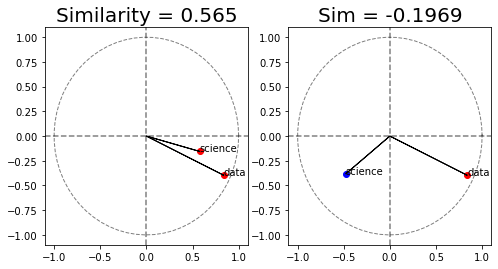

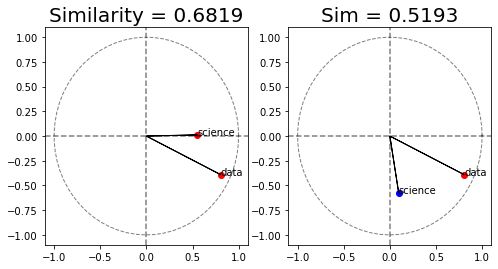

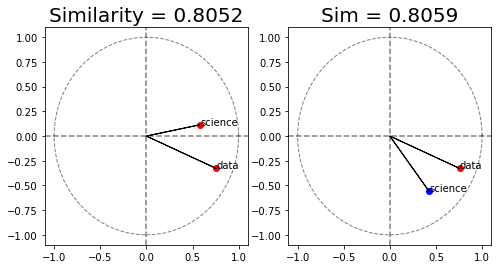

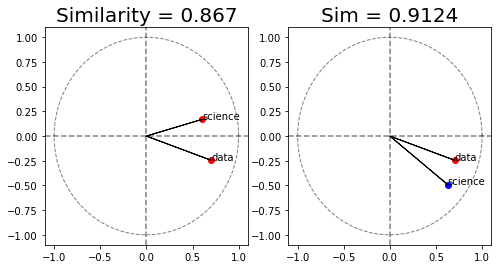

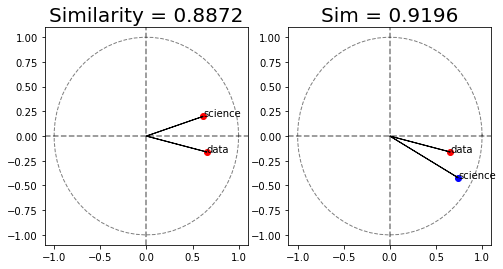

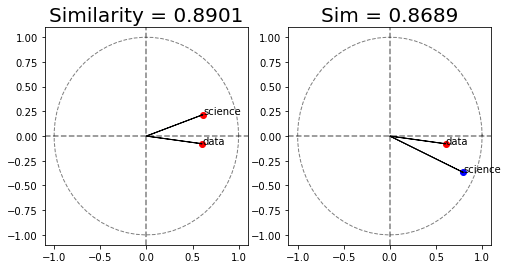

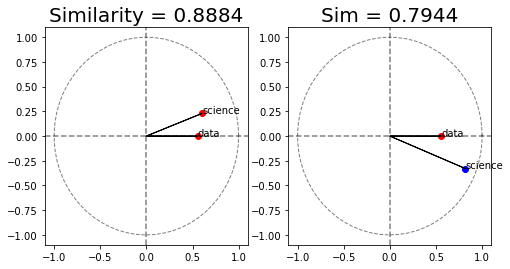

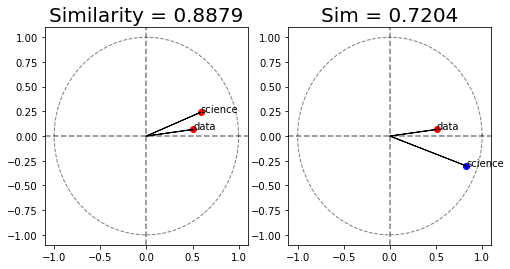

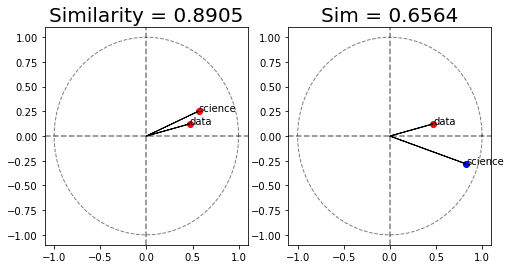

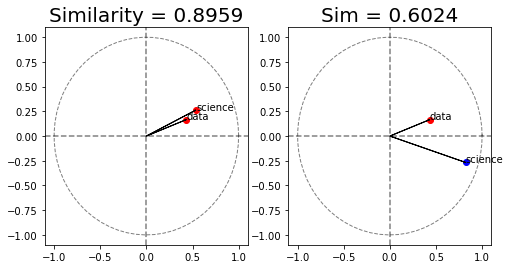

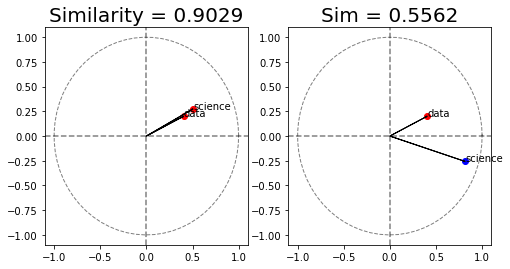

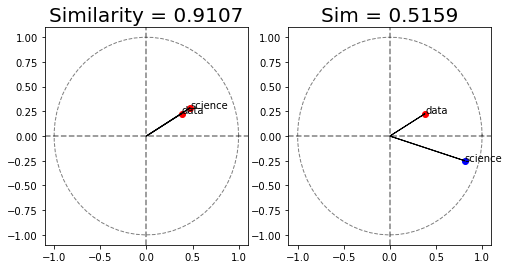

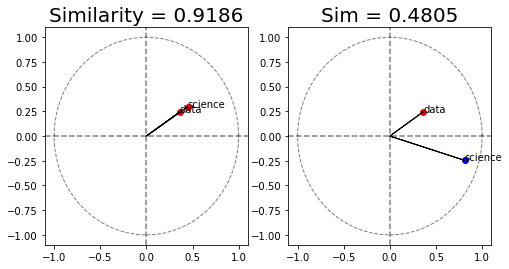

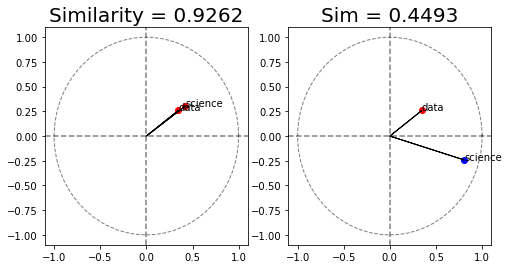

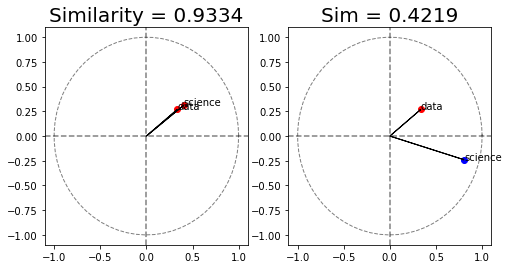

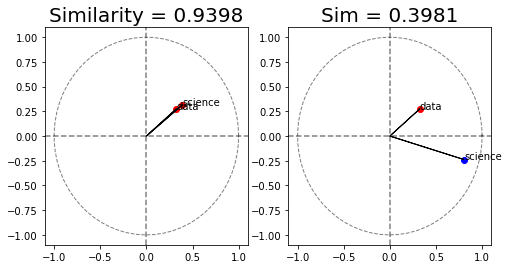

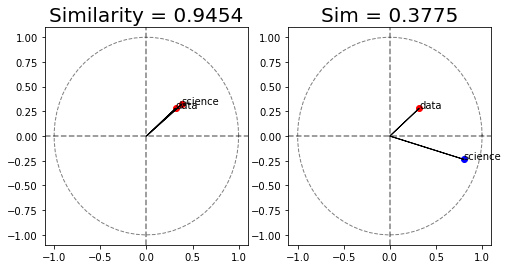

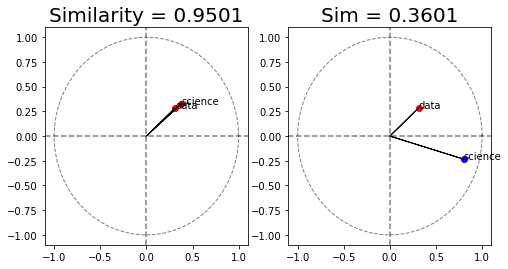

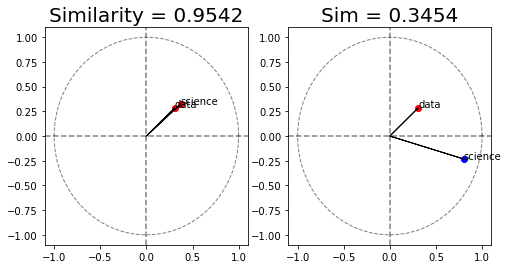

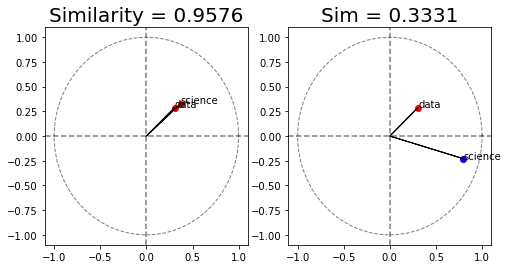

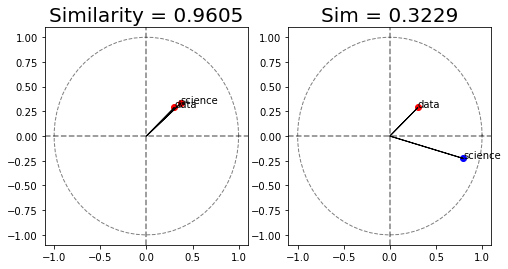

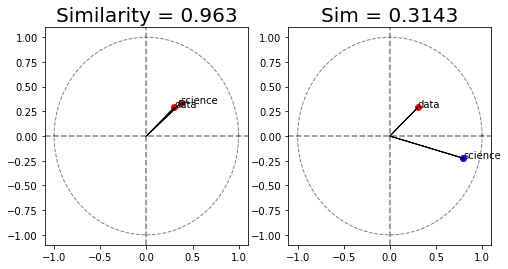

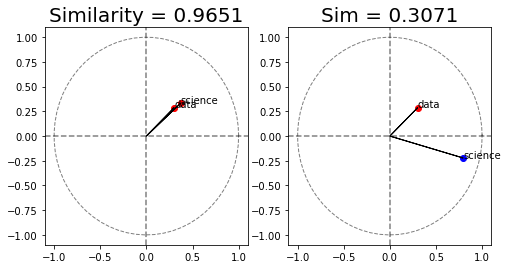

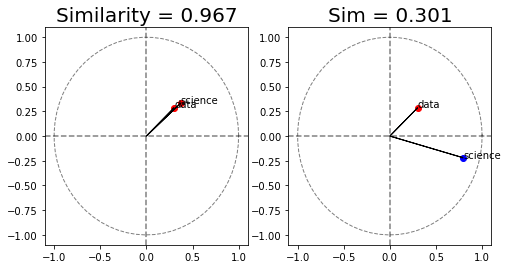

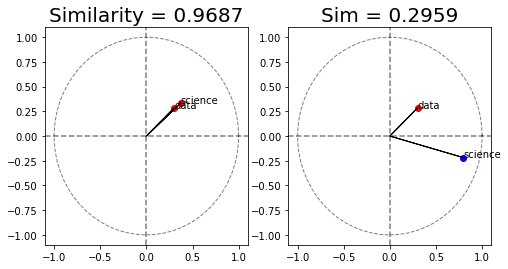

In [13]:
EMBEDDING_SIZE = 5

main_embeddings = np.random.normal(0,0.1,(len(words), EMBEDDING_SIZE))#Draw random samples from a normal (Gaussian) distribution.
#center of distribution is 0 ,std_dev is considered to be 0.1,output shape must be equal to (intersection of common words * embedding_Size)


#eucliden norm 
#underroot of (summation of (square of value ))
row_norms = np.sqrt((main_embeddings**2).sum(axis=1)).reshape(-1,1)

main_embeddings = main_embeddings / row_norms



#similarly for context embeddings
context_embeddings = np.random.normal(0,0.1,(len(words), EMBEDDING_SIZE))
row_norms = np.sqrt((context_embeddings**2).sum(axis=1)).reshape(-1,1)
context_embeddings = context_embeddings / row_norms

#converting to dataframe
main_embeddings = pd.DataFrame(data=main_embeddings, index=words)
context_embeddings = pd.DataFrame(data=context_embeddings, index=words)

#for 25 epochs
for _ in range(25):
    main_embeddings, context_embeddings = update_embeddings(df, main_embeddings, context_embeddings, 0.1, ['data', 'science'])

In [14]:
L = []
for w1 in words:
    for w2 in words:
        if w1 != w2:
            sim = 1 - cosine(main_embeddings.loc[w1], main_embeddings.loc[w2])
            L.append((w1,w2,sim))
sorted([item for item in L if item[0] == 'data'], key=lambda t: -t[2])[:10]

[('data', 'and', 0.9924790732782032),
 ('data', 'science', 0.9701762239578056),
 ('data', 'but', 0.9643603996840694),
 ('data', 'statistics', 0.9506214846715753),
 ('data', 'are', 0.9423154188566272),
 ('data', 'after', 0.9410362765652676),
 ('data', 'thanks', 0.9367162544669435),
 ('data', 'because', 0.9254743901261033),
 ('data', 'became', 0.903232827263946),
 ('data', 'for', 0.86711465949703)]

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=2)
transf_embeddings = pca.fit_transform(main_embeddings.values)
words_used = main_embeddings.index

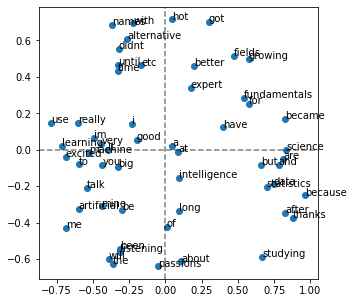

In [17]:
plt.figure(figsize=(5,5))
plt.scatter(transf_embeddings[:,0], transf_embeddings[:,1])
for idx,row in enumerate(transf_embeddings):
    plt.text(row[0], row[1], str(words_used[idx]))
plt.axvline(0, color='k', linestyle='--', alpha=0.5)
plt.axhline(0, color='k', linestyle='--', alpha=0.5)

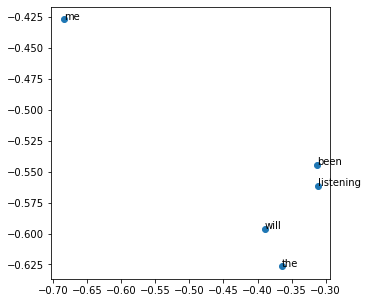

In [18]:
plt.figure(figsize=(5,5))

chosen_idxs = (transf_embeddings[:,0] < -.25) & (transf_embeddings[:,1] < -0.4)
transf_embeddings = transf_embeddings[chosen_idxs]
words_used = words_used[chosen_idxs]

plt.scatter(transf_embeddings[:,0], transf_embeddings[:,1])
for idx,row in enumerate(transf_embeddings):
    plt.text(row[0], row[1], str(words_used[idx]))

In [19]:
file.close()